In [1]:
# -*- coding: utf-8 -*-

In [2]:
%%!
pip install --trusted-host pypi.org ipython-sql

['Requirement already satisfied: ipython-sql in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (0.3.9)',
 'Requirement already satisfied: sqlalchemy>=0.6.7 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (1.3.16)',
 'Requirement already satisfied: ipython-genutils>=0.1.0 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (0.2.0)',
 'Requirement already satisfied: ipython>=1.0 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (7.13.0)',
 'Requirement already satisfied: prettytable in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (0.7.2)',
 'Requirement already satisfied: sqlparse in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (0.3.1)',
 'Requirement already satisfied: six in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (1.14.0)',
 'Requirement already satisfied: pygments in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython>=1.0->ipython-sql)

In [3]:
%%!
pip install wget

['Requirement already satisfied: wget in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (3.2)',
 'WARNING: You are using pip version 20.0.2; however, version 20.1.1 is available.',
 "You should consider upgrading via the 'c:\\osgeo4~1\\bin\\python3.exe -m pip install --upgrade pip' command."]

In [4]:
%load_ext sql

In [5]:
from IPython.core.display import HTML, SVG
import pandas as pd
import numpy as np
import IPython 
from ipywidgets import Layout
from ipywidgets import widgets
from IPython.display import display

In [6]:
def read_csv(filename):
    df = pd.read_csv(filename)
    return df

csv_covid = read_csv(r'C:\Windows\System32\0 SIG\Australian_Cases_by_LGA.csv')
print(csv_covid)

     OBJECTID  LGA_CODE19                   LGA_NAME19  \
0           1       10050                   Albury (C)   
1           2       10130        Armidale Regional (A)   
2           3       10250                  Ballina (A)   
3           4       10300                Balranald (A)   
4           5       10470        Bathurst Regional (A)   
..        ...         ...                          ...   
539       540       74660              West Arnhem (R)   
540       541       74680                West Daly (R)   
541       542       79399            Unincorporated NT   
542       543       89399           Unincorporated ACT   
543       544       99399  Unincorp. Other Territories   

                       STE_NAME16  AREASQKM19  Population  Cases  \
0                 New South Wales    305.9459     53767.0    8.0   
1                 New South Wales   8620.6990     30707.0    4.0   
2                 New South Wales    484.9389     44208.0    8.0   
3                 New South Wal

In [7]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True)
#from qgis.server import *
from qgis.gui import *
from qgis import processing
from qgis.PyQt import QtGui
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
from IPython.display import Image
from qgis.utils import iface

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/local/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/josea/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/josea/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [9]:
from qgis.core import (
    QgsVectorLayer
)

In [10]:
vlayer = QgsVectorLayer(r'C:\Windows\System32\0 SIG\AU_adm\AUS_adm2.shp', "AUS_adm2", "ogr")

if not vlayer.isValid():
    print("Camada não carregada!")
else:
    print("Camada carregada!")
    QgsProject.instance().addMapLayer(vlayer)

Camada carregada!


In [11]:
uri = r'file:///C:\Windows\System32\0 SIG\Australian_Cases.csv?delimiter=,'

csv_file = QgsVectorLayer(uri, 'AUS', 'delimitedtext')

if not csv_file.isValid():
    print("Camada não carregada!")
else:
    print("Camada carregada!")
    QgsProject.instance().addMapLayer(csv_file)

Camada carregada!


In [12]:
QgsProject.instance().addMapLayer(vlayer)
QgsProject.instance().addMapLayer(csv_file)
csvField='Nomes'
shpField='NAME_2'

joinObject=QgsVectorLayerJoinInfo()

joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)

joinObject.setJoinLayerId(csv_file.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(csv_file)

vlayer.addJoin(joinObject)

vectorlayer = QgsProject.instance().mapLayersByName('AUS_adm2')[0]

for field in vectorlayer.fields():
    print("Column "+field.name()+" Load")

Column ID_0 Load
Column ISO Load
Column NAME_0 Load
Column ID_1 Load
Column NAME_1 Load
Column ID_2 Load
Column NAME_2 Load
Column TYPE_2 Load
Column ENGTYPE_2 Load
Column NL_NAME_2 Load
Column VARNAME_2 Load
Column AUS_OBJECTID Load
Column AUS_LGA_CODE19 Load
Column AUS_LGA_NAME19 Load
Column AUS_STE_NAME16 Load
Column AUS_AREASQKM19 Load
Column AUS_Population Load
Column AUS_Cases Load
Column AUS_LastUpdated Load
Column AUS_Shape__Area Load
Column AUS_Shape__Length Load
Column AUS_Cases_Str Load
Column AUS_PopNorm Load
Column AUS_Casos Load


In [13]:
label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "AUS_Casos"

text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setFillColor(QColor('white'))
background_color.setEnabled(True)

text_format.setSize(12)

text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

<QgsRectangle: 112.9197235107421875 -55.11694335937494316, 159.2560882568359375 -9.22109889984129083>
Gerar mapa com 900 por 900


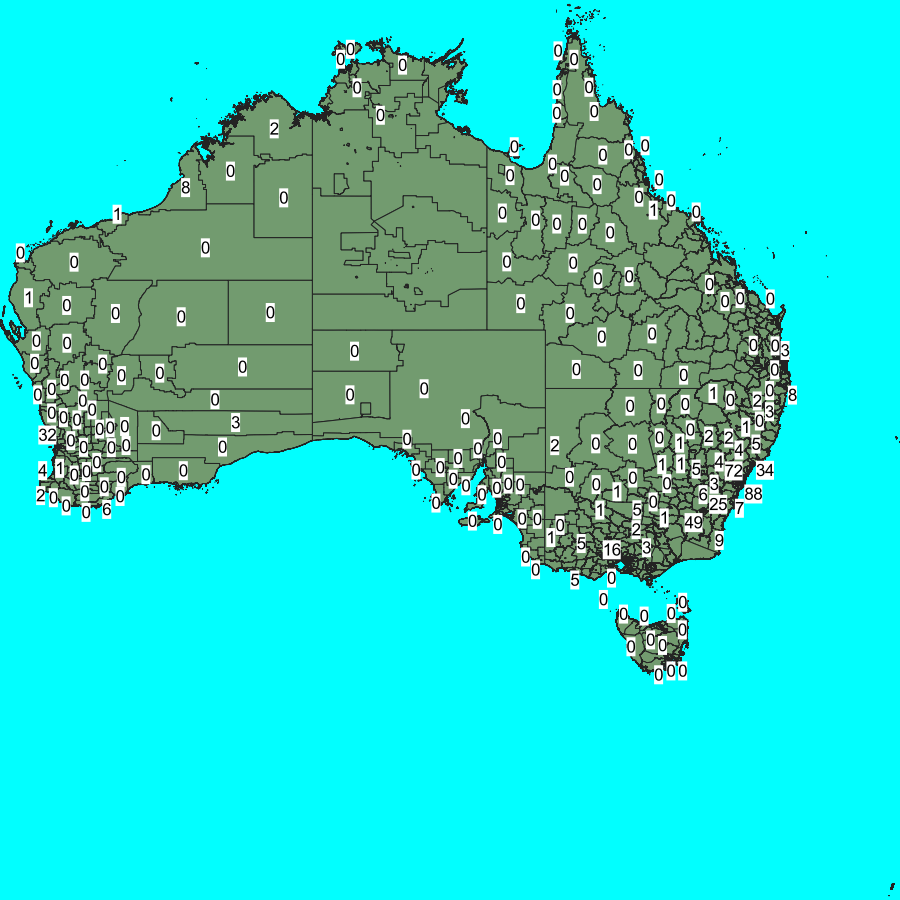

In [14]:
vectorlayer = QgsProject.instance().mapLayersByName('AUS_adm2')[0]

xt = vectorlayer.extent()
print(xt)

width  = 900
height = 900
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vectorlayer])
options.setBackgroundColor(QColor(1, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('aus.png',"PNG")
Image( imgbuf.data() )

In [15]:
label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "AUS_Casos"

text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setFillColor(QColor('white'))
background_color.setEnabled(True)

text_format.setSize(12)

text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)

#qml_path = "C:/Windows/System32/0 SIG/Graduado_Vermelho.qml"
#vlayer.loadNamedStyle(qml_path)

vlayer.triggerRepaint()

In [16]:
vectorlayer = QgsProject.instance().mapLayersByName('AUS_adm2')[0]

myTargetField = 'AUS_Casos'
myRangeList = []
myOpacity = 1

# Make our first symbol and range...
myMin = 0.0
myMax = 0.0
myLabel = 'Group 1'
myColour = QtGui.QColor('#ffffff')
mySymbol1 = QgsSymbol.defaultSymbol(vectorlayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 0.1
myMax = 1.0
myLabel = 'Group 2'
myColour = QtGui.QColor('#ff8080')
mySymbol2 = QgsSymbol.defaultSymbol(
vectorlayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#now make another symbol and range...
myMin = 1.1
myMax = 8.0
myLabel = 'Group 3'
myColour = QtGui.QColor('#ff4040')
mySymbol3 = QgsSymbol.defaultSymbol(
vectorlayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#now make another symbol and range...
myMin = 8.1
myMax = 183.0
myLabel = 'Group 4'
myColour = QtGui.QColor('#ff0000')
mySymbol4 = QgsSymbol.defaultSymbol(
vectorlayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myRenderer.setMode(QgsGraduatedSymbolRenderer.EqualInterval)
myRenderer.setClassAttribute(myTargetField)

vectorlayer.setRenderer(myRenderer)
QgsProject.instance().addMapLayer(vectorlayer)

C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: QgsGraduatedSymbolRenderer.setMode() is deprecated


<QgsRectangle: 112.9197235107421875 -55.11694335937494316, 159.2560882568359375 -9.22109889984129083>
Gerar mapa com 900 por 900


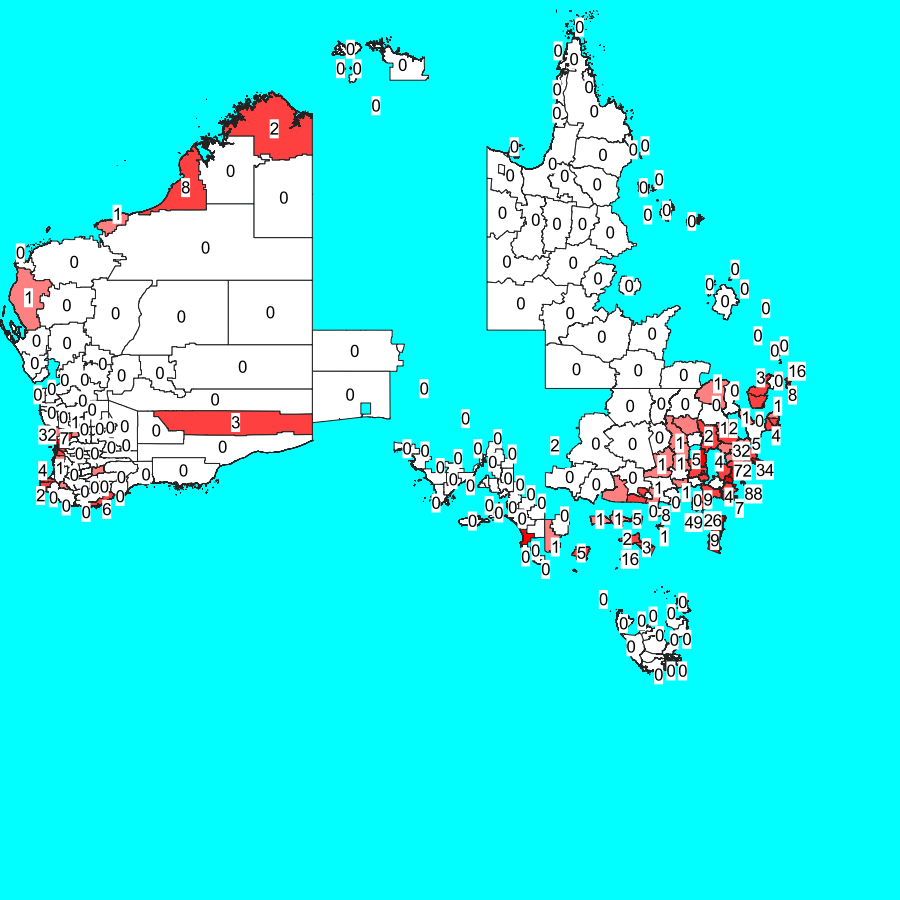

In [17]:
xt = vectorlayer.extent()
print(xt)

width  = 900
height = 900
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vectorlayer])
options.setBackgroundColor(QColor(1, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('aus_vermelho.png',"PNG")
Image( imgbuf.data() )

In [18]:
vlayer1 = QgsVectorLayer(r'C:\Windows\System32\0 SIG\AU_adm\AUS_adm1.shp', "AUS_adm1", "ogr")

if not vlayer1.isValid():
    print("Camada não carregada!")
else:
    print("Camada carregada!")
    QgsProject.instance().addMapLayer(vlayer1)

Camada carregada!


In [19]:
uri = r'file:///C:\Windows\System32\0 SIG\Australian_Cases_Region.csv?delimiter=,'

csv_file1 = QgsVectorLayer(uri, 'AUS', 'delimitedtext')

if not csv_file1.isValid():
    print("Camada não carregada!")
else:
    print("Camada carregada!")
    QgsProject.instance().addMapLayer(csv_file1)

Camada carregada!


In [20]:
QgsProject.instance().addMapLayer(vlayer1)
QgsProject.instance().addMapLayer(csv_file1)
csvField='STE_NAME16'
shpField='NAME_1'

joinObject=QgsVectorLayerJoinInfo()

joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)

joinObject.setJoinLayerId(csv_file1.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(csv_file1)

vlayer1.addJoin(joinObject)

vectorlayer1 = QgsProject.instance().mapLayersByName('AUS_adm1')[0]

for field in vectorlayer1.fields():
    print("Column "+field.name()+" Load")

Column ID_0 Load
Column ISO Load
Column NAME_0 Load
Column ID_1 Load
Column NAME_1 Load
Column TYPE_1 Load
Column ENGTYPE_1 Load
Column NL_NAME_1 Load
Column VARNAME_1 Load
Column AUS_Casos Load


In [21]:
label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "AUS_Casos"

text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setFillColor(QColor('white'))
background_color.setEnabled(True)

text_format.setSize(12)

text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer1.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer1.setLabelsEnabled(True)
vlayer1.triggerRepaint()

<QgsRectangle: 112.91972351074252856 -55.11694335937494316, 159.25608825683590908 -9.22109889984126951>
Gerar mapa com 900 por 900


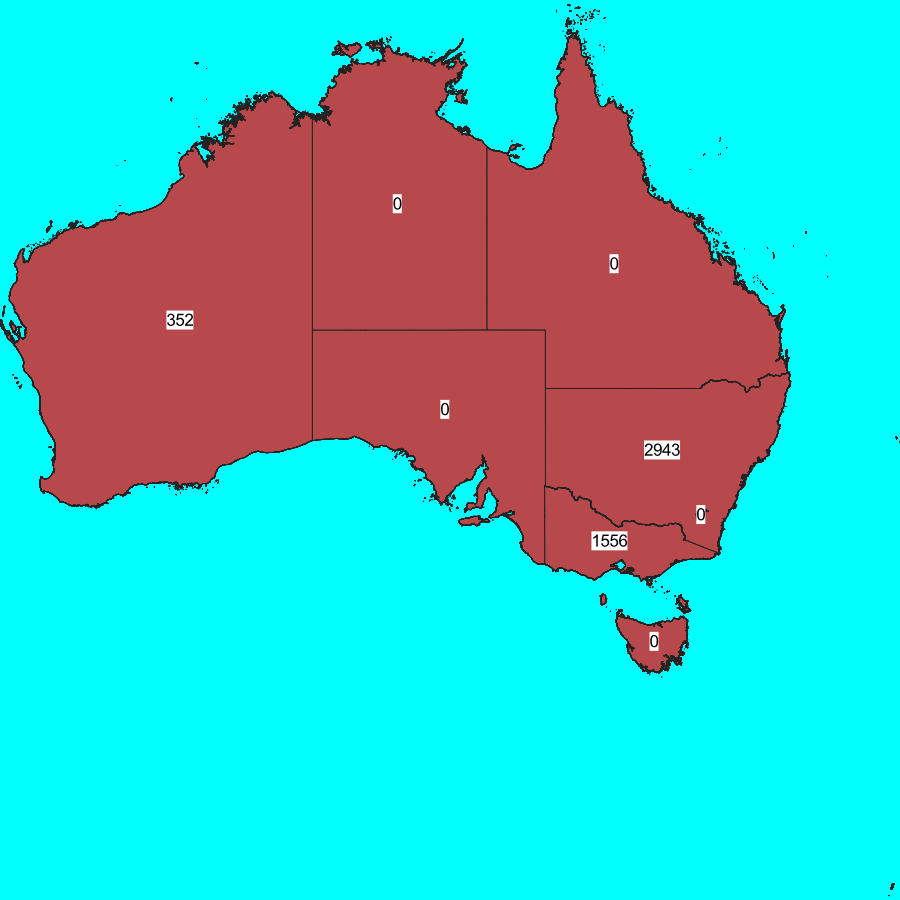

In [22]:
vectorlayer1 = QgsProject.instance().mapLayersByName('AUS_adm1')[0]

xt = vectorlayer1.extent()
print(xt)

width  = 900
height = 900
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vectorlayer1])
options.setBackgroundColor(QColor(1, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('aus_regions.png',"PNG")
Image( imgbuf.data() )

In [23]:
label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "AUS_Casos"

text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setFillColor(QColor('white'))
background_color.setEnabled(True)

text_format.setSize(12)

text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer1.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer1.setLabelsEnabled(True)
vlayer1.triggerRepaint()

In [24]:
vectorlayer = QgsProject.instance().mapLayersByName('AUS_adm1')[0]

myTargetField = 'AUS_Casos'
myRangeList = []
myOpacity = 1

# Make our first symbol and range...
myMin = 0.0
myMax = 0.0
myLabel = 'Group 1'
myColour = QtGui.QColor('#ffffff')
mySymbol1 = QgsSymbol.defaultSymbol(vectorlayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 0.1
myMax = 1000.0
myLabel = 'Group 2'
myColour = QtGui.QColor('#ff8080')
mySymbol2 = QgsSymbol.defaultSymbol(
vectorlayer1.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#now make another symbol and range...
myMin = 1000.1
myMax = 2000.0
myLabel = 'Group 3'
myColour = QtGui.QColor('#ff4040')
mySymbol3 = QgsSymbol.defaultSymbol(
vectorlayer1.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#now make another symbol and range...
myMin = 2000.1
myMax = 3000.0
myLabel = 'Group 4'
myColour = QtGui.QColor('#ff0000')
mySymbol4 = QgsSymbol.defaultSymbol(
vectorlayer1.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myRenderer.setMode(QgsGraduatedSymbolRenderer.EqualInterval)
myRenderer.setClassAttribute(myTargetField)

vectorlayer1.setRenderer(myRenderer)
QgsProject.instance().addMapLayer(vectorlayer1)

C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: QgsGraduatedSymbolRenderer.setMode() is deprecated


<QgsRectangle: 112.91972351074252856 -55.11694335937494316, 159.25608825683590908 -9.22109889984126951>
Gerar mapa com 900 por 900


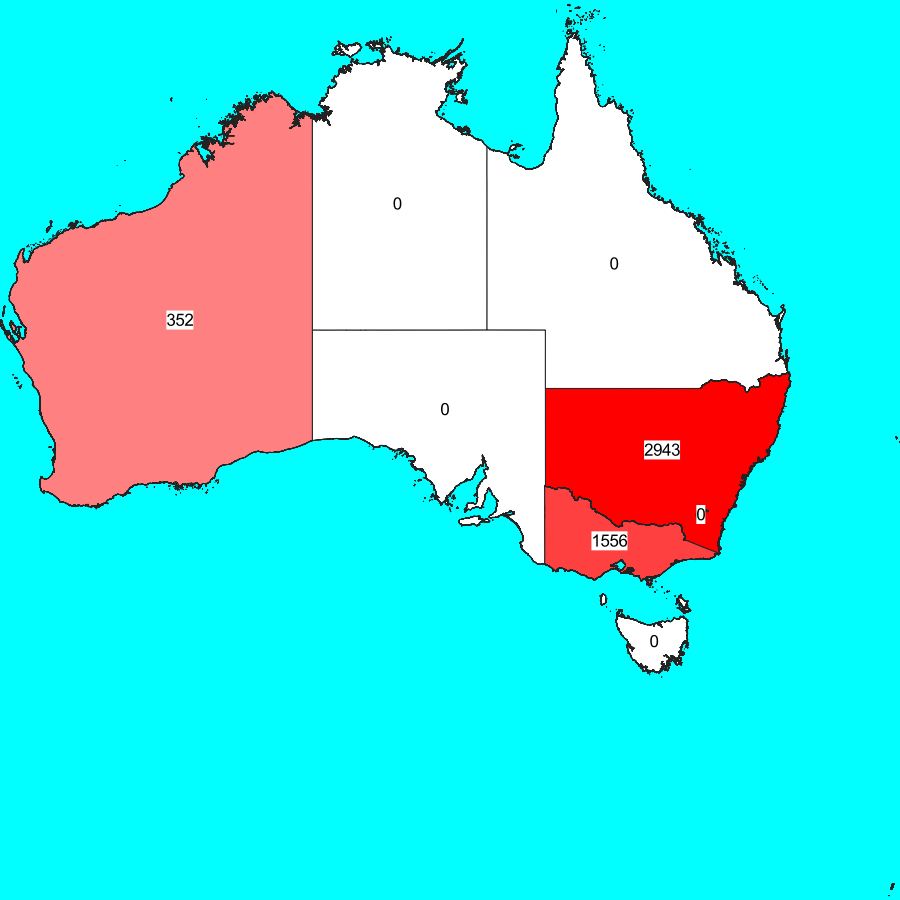

In [25]:
vectorlayer1 = QgsProject.instance().mapLayersByName('AUS_adm1')[0]

xt = vectorlayer1.extent()
print(xt)

width  = 900
height = 900
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vectorlayer1])
options.setBackgroundColor(QColor(1, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('aus_regions_vermelho.png',"PNG")
Image( imgbuf.data() )

In [26]:
vlayer0 = QgsVectorLayer(r'C:\Windows\System32\0 SIG\AU_adm\AUS_adm0.shp', "AUS_adm0", "ogr")

if not vlayer0.isValid():
    print("Camada não carregada!")
else:
    print("Camada carregada!")
    QgsProject.instance().addMapLayer(vlayer1)

Camada carregada!


In [27]:
uri = r'file:///C:\Windows\System32\0 SIG\Australian_Cases_Country.csv?delimiter=,'

csv_file0 = QgsVectorLayer(uri, 'AUS', 'delimitedtext')

if not csv_file0.isValid():
    print("Camada não carregada!")
else:
    print("Camada carregada!")
    QgsProject.instance().addMapLayer(csv_file0)

Camada carregada!


In [28]:
QgsProject.instance().addMapLayer(vlayer0)
QgsProject.instance().addMapLayer(csv_file0)
csvField='Nome'
shpField='NAME_0'

joinObject=QgsVectorLayerJoinInfo()

joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)

joinObject.setJoinLayerId(csv_file0.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(csv_file0)

vlayer0.addJoin(joinObject)

vectorlayer0 = QgsProject.instance().mapLayersByName('AUS_adm0')[0]

for field in vectorlayer0.fields():
    print("Column "+field.name()+" Load")

Column ID_0 Load
Column ISO Load
Column NAME_0 Load
Column OBJECTID_1 Load
Column ISO3 Load
Column NAME_ENGLI Load
Column NAME_ISO Load
Column NAME_FAO Load
Column NAME_LOCAL Load
Column NAME_OBSOL Load
Column NAME_VARIA Load
Column NAME_NONLA Load
Column NAME_FRENC Load
Column NAME_SPANI Load
Column NAME_RUSSI Load
Column NAME_ARABI Load
Column NAME_CHINE Load
Column WASPARTOF Load
Column CONTAINS Load
Column SOVEREIGN Load
Column ISO2 Load
Column WWW Load
Column FIPS Load
Column ISON Load
Column VALIDFR Load
Column VALIDTO Load
Column POP2000 Load
Column SQKM Load
Column POPSQKM Load
Column UNREGION1 Load
Column UNREGION2 Load
Column DEVELOPING Load
Column CIS Load
Column Transition Load
Column OECD Load
Column WBREGION Load
Column WBINCOME Load
Column WBDEBT Load
Column WBOTHER Load
Column CEEAC Load
Column CEMAC Load
Column CEPLG Load
Column COMESA Load
Column EAC Load
Column ECOWAS Load
Column IGAD Load
Column IOC Load
Column MRU Load
Column SACU Load
Column UEMOA Load
Column UMA 

In [29]:
label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "AUS_Casos"

text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setFillColor(QColor('white'))
background_color.setEnabled(True)

text_format.setSize(30)

text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer0.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer0.setLabelsEnabled(True)
vlayer0.triggerRepaint()

<QgsRectangle: 112.91972351074275593 -55.11694335937477263, 159.25608825683616487 -9.22109889984120201>
Gerar mapa com 900 por 900


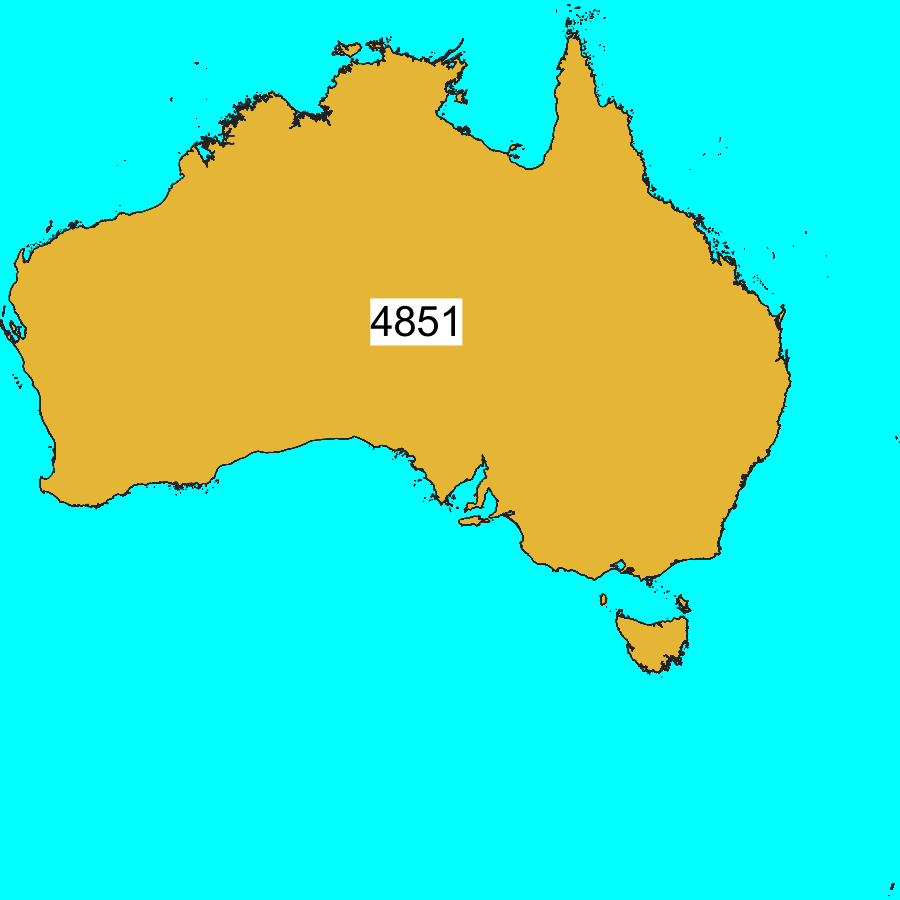

In [30]:
vectorlayer0 = QgsProject.instance().mapLayersByName('AUS_adm0')[0]

xt = vectorlayer0.extent()
print(xt)

width  = 900
height = 900
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vectorlayer0])
options.setBackgroundColor(QColor(1, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('aus_country.png',"PNG")
Image( imgbuf.data() )